In [1]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import warnings,os,datetime

import tensorflow as tf
import pandas as pd
from sklearn import preprocessing as pp
import seaborn as sns

from keras.models import Model,Sequential
from keras.layers import Dense,Dropout,LSTM,Conv2D,Conv2DTranspose,MaxPooling2D,UpSampling2D,Input,BatchNormalization,Flatten

warnings.filterwarnings('ignore')
sns.set()

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('Data\\data1\\all_stocks_5yr.csv',infer_datetime_format=True)

In [3]:
ticker_list = list(set(df['Name'].values))

names = []
ind = []

for k in range(len(ticker_list)):
    ticker = df[df['Name']==ticker_list[k]].sort_values(by='date')['close'].values
    if ticker.shape[0]!=1259: continue
    names.append(ticker_list[k])
    ind.append(ticker)

tickers = np.vstack(ind)
dtickers = np.diff(tickers,axis=1)

dfT = pd.DataFrame(data=tickers,index=None)
dfD = pd.DataFrame(data=dtickers,index=None)

In [50]:
vtickers = dtickers[np.argsort(tickers.max(axis=1))[-20:],:]
vnames = np.vstack(names)[np.argsort(tickers.max(axis=1))[-20:]]

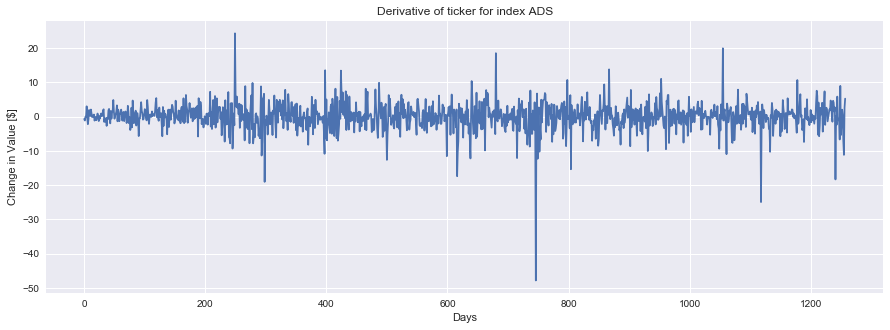

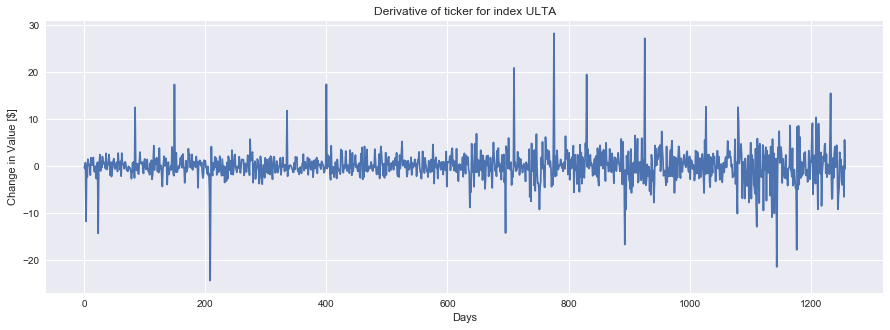

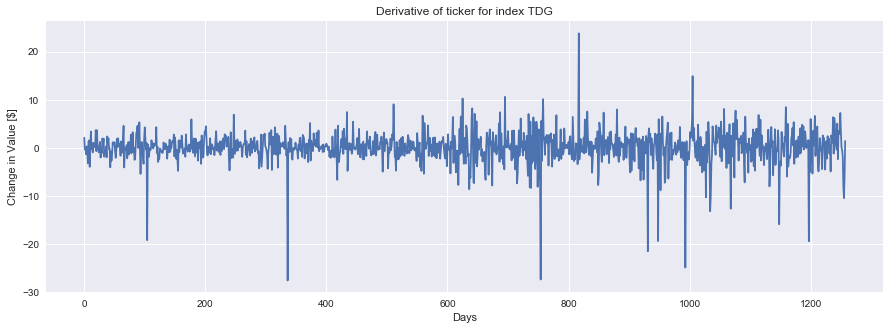

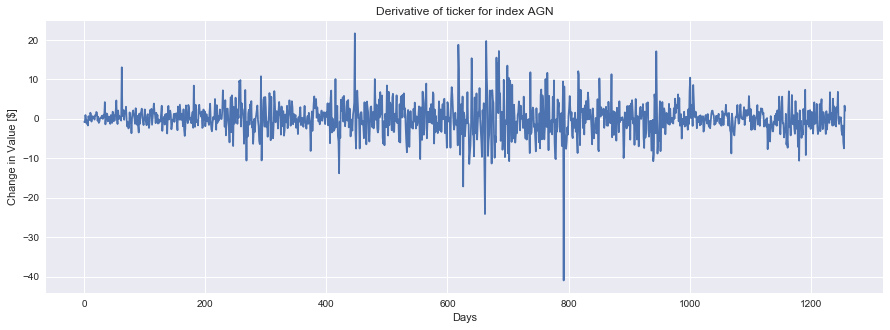

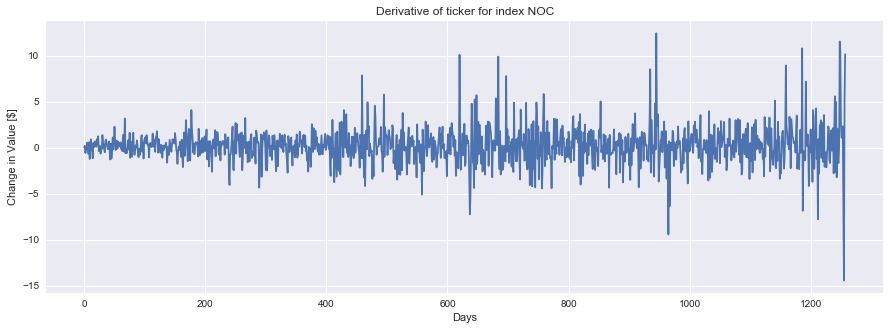

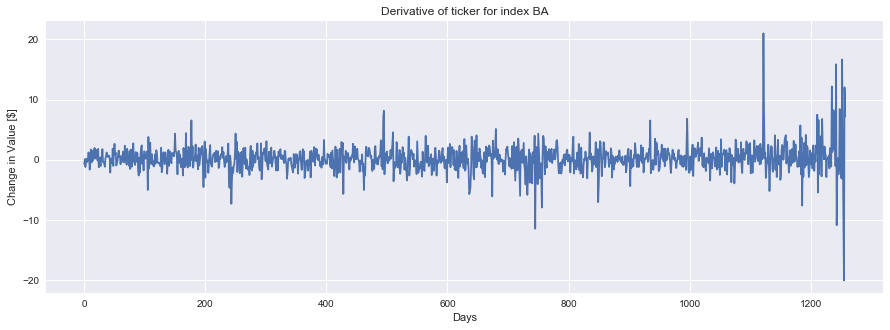

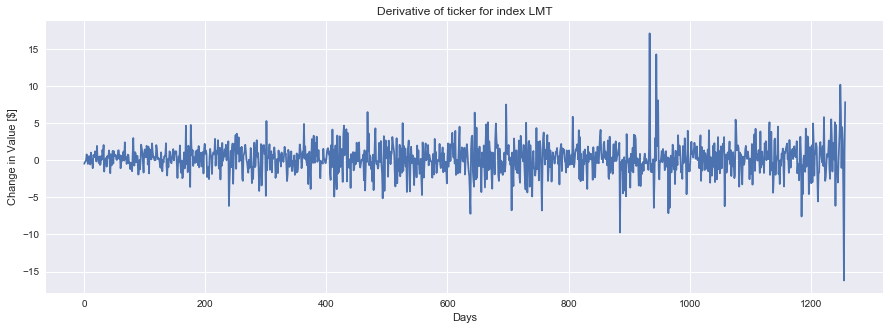

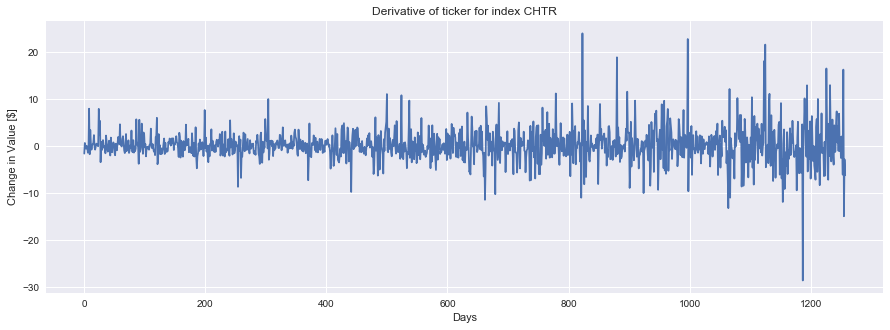

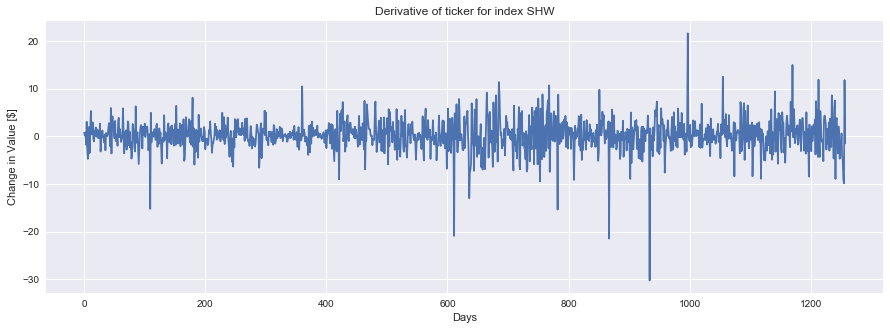

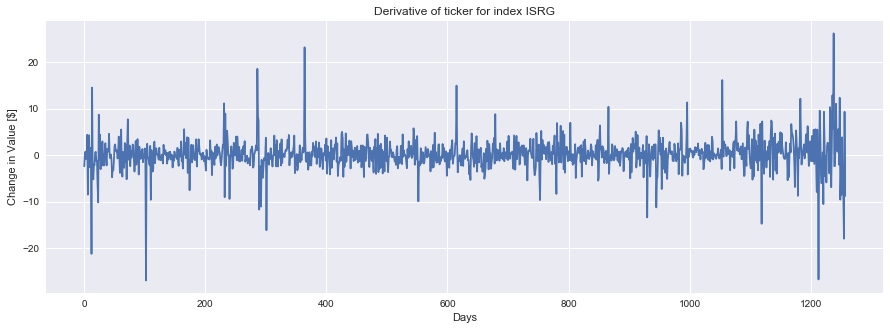

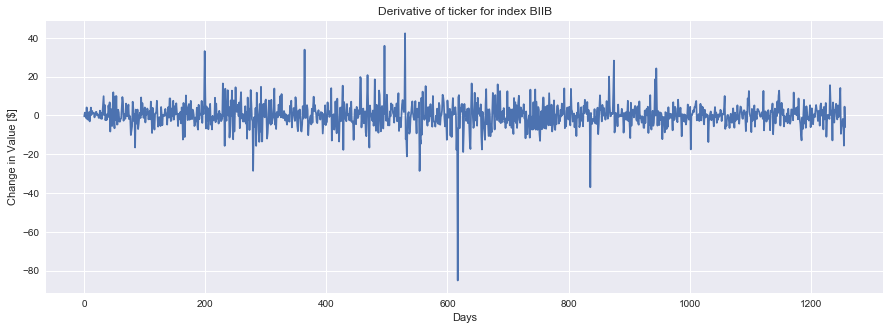

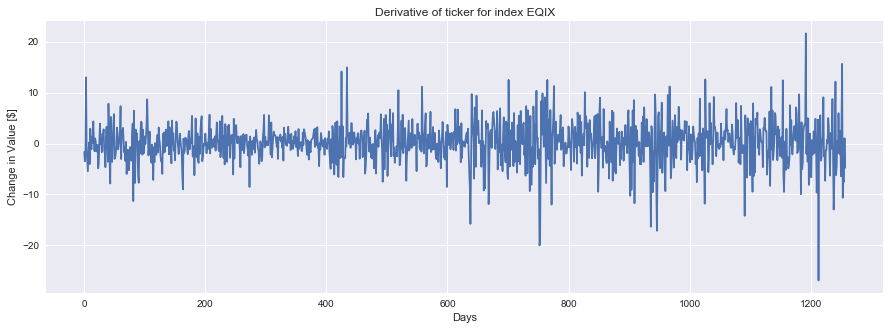

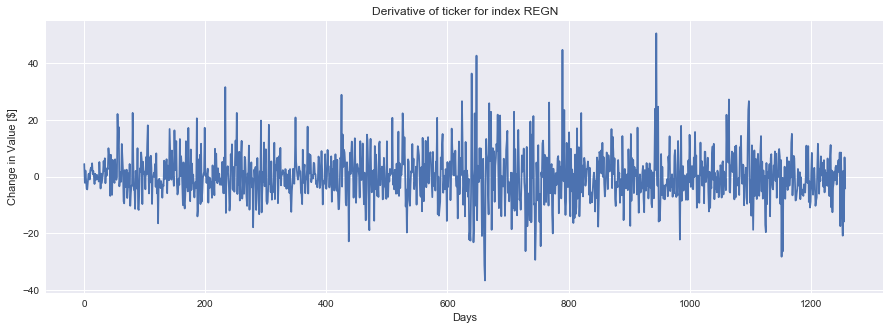

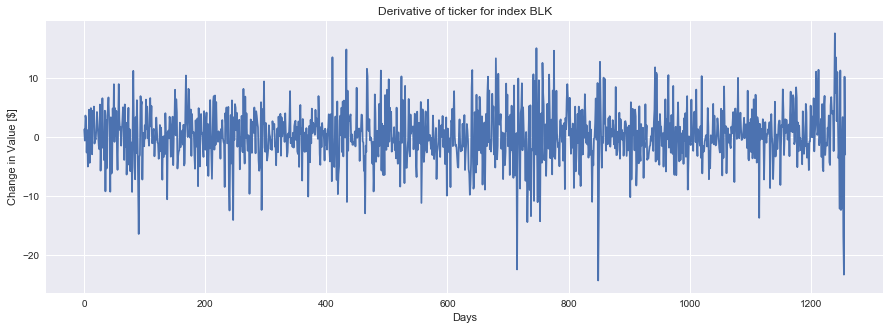

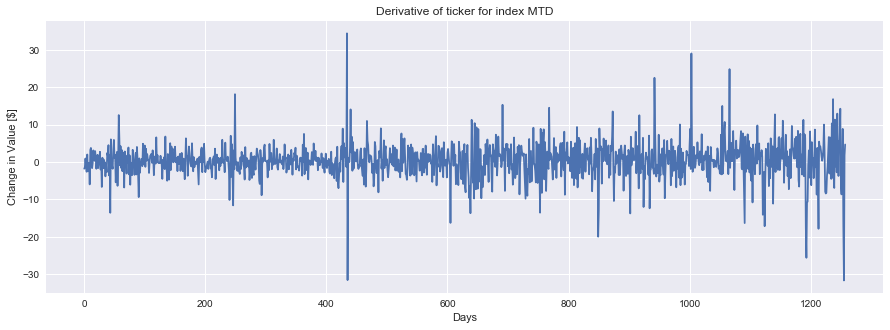

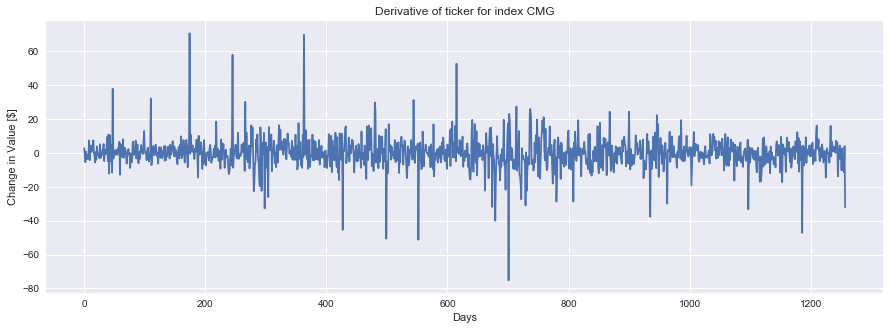

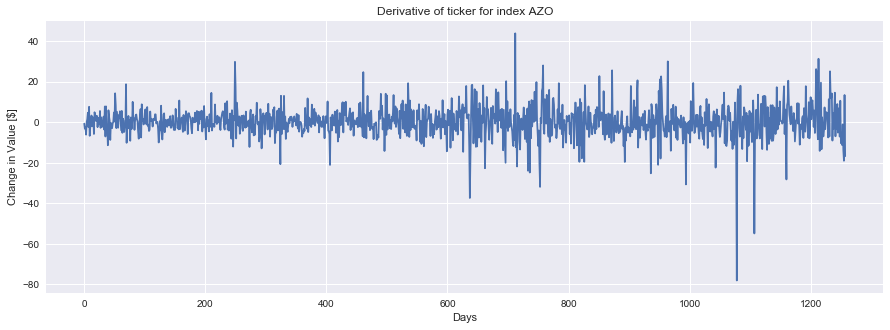

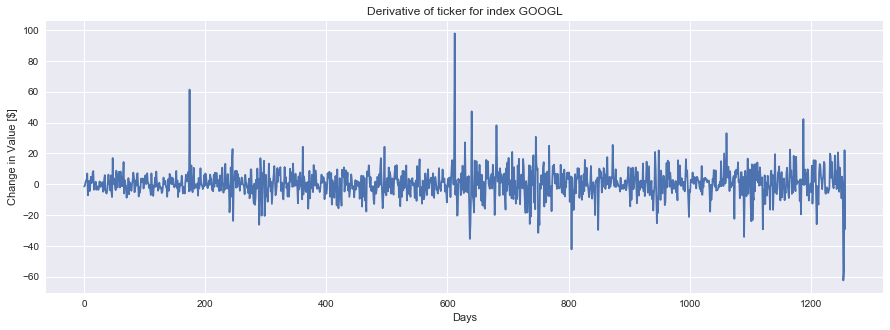

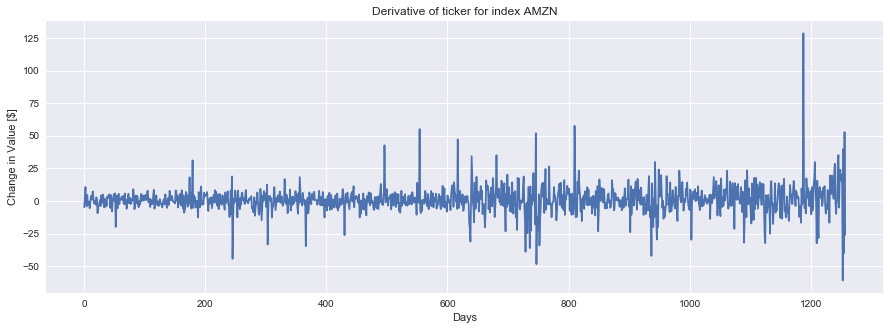

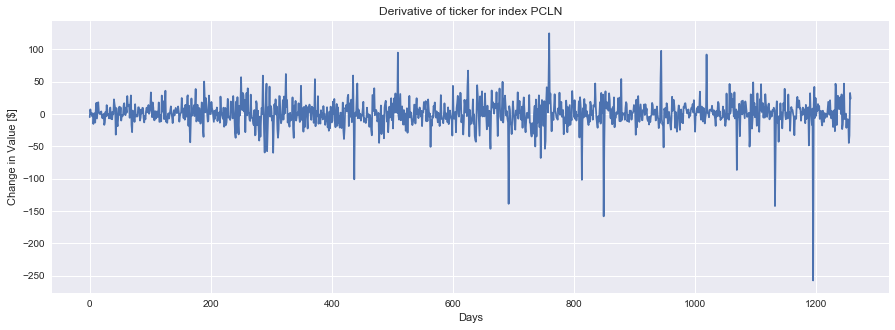

In [51]:
for k in range(vtickers.shape[0]):
    
    fig = plt.figure(figsize=(15,5))
    plt.plot(vtickers[k,:])
    plt.title('Derivative of ticker for index '+str(vnames[k,0]))
    plt.xlabel('Days')
    plt.ylabel('Change in Value [$]')
    plt.show()

In [80]:
data = []

for k in range(vtickers.shape[0]):
    
    cc = vtickers[k,:].copy()
    cc[np.abs(cc)<max(np.abs(cc))*0.4]=0
    
    data.append(cc)

data = np.vstack(data)

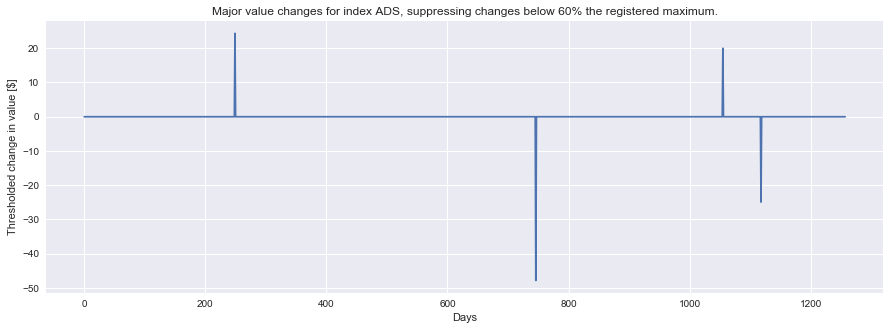

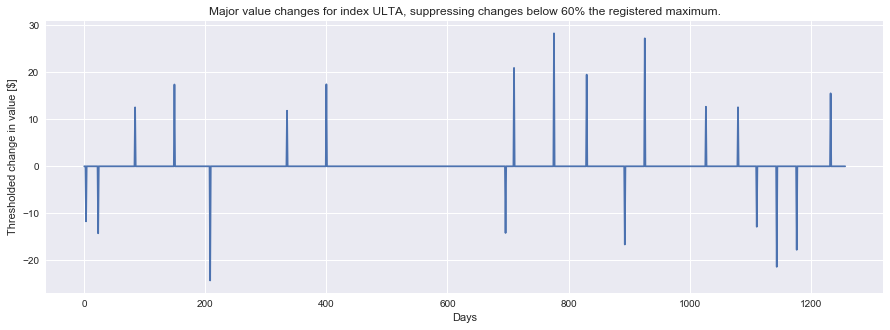

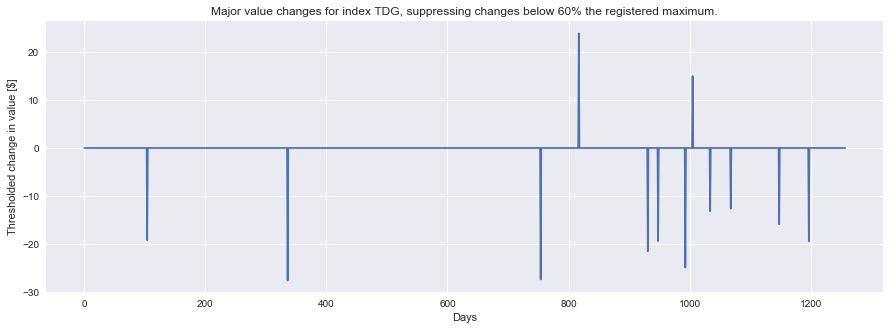

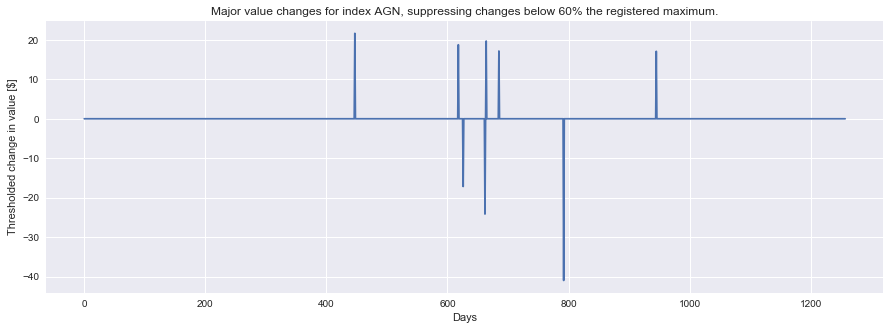

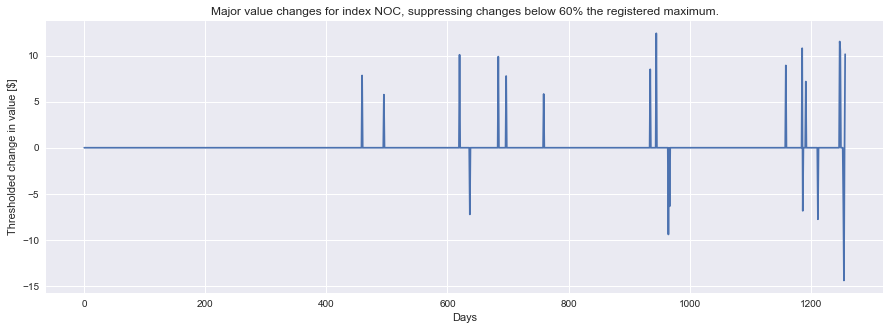

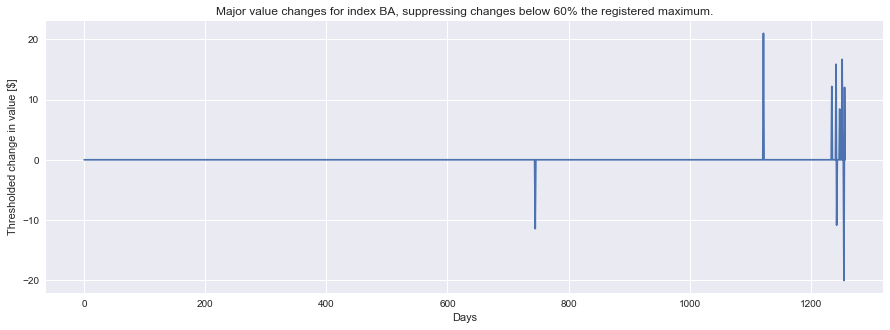

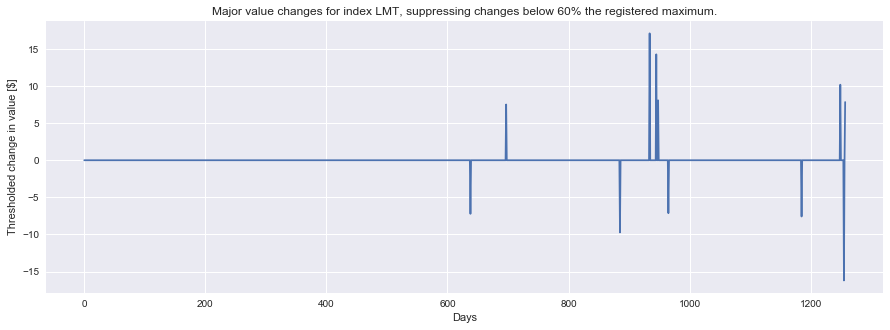

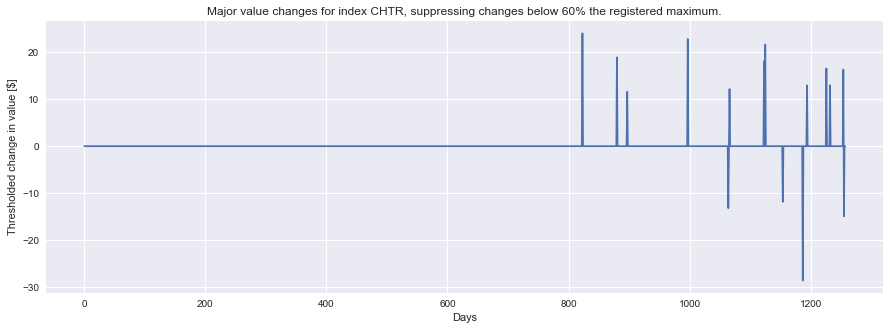

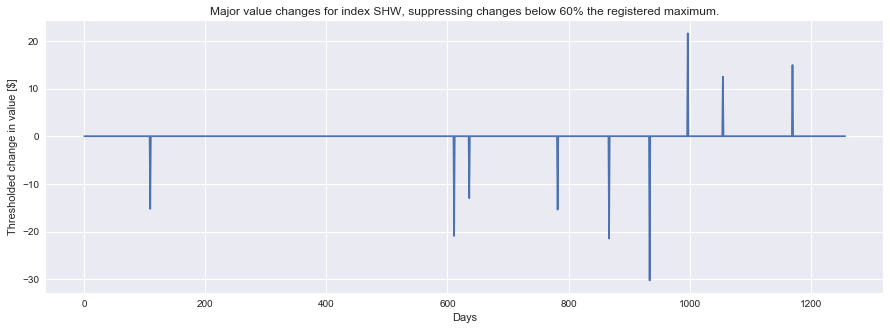

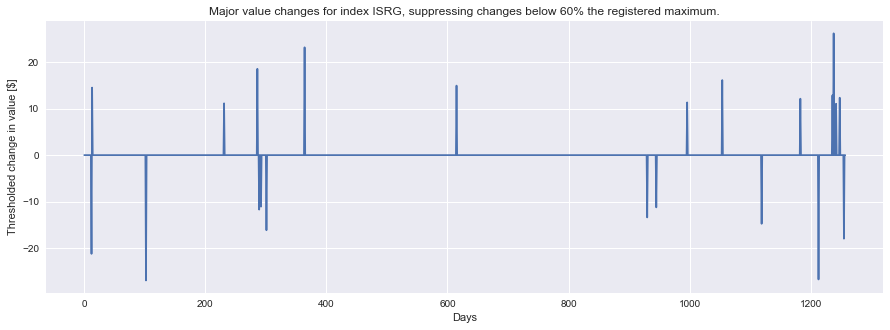

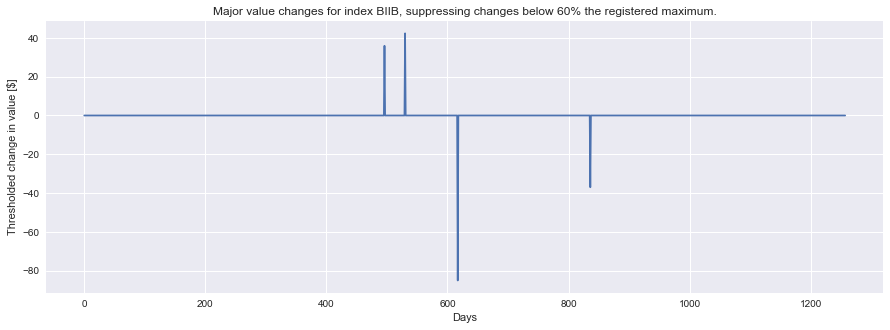

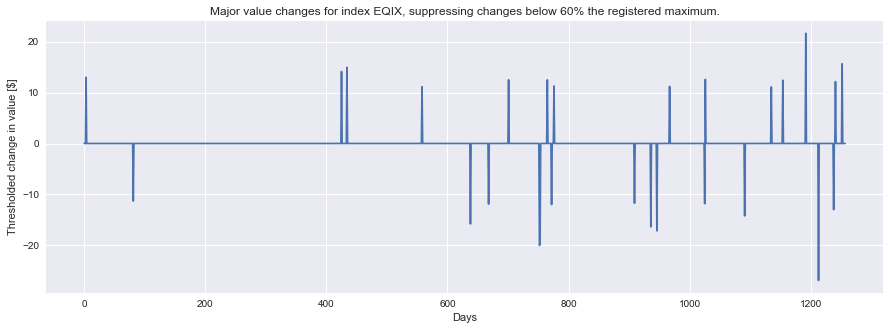

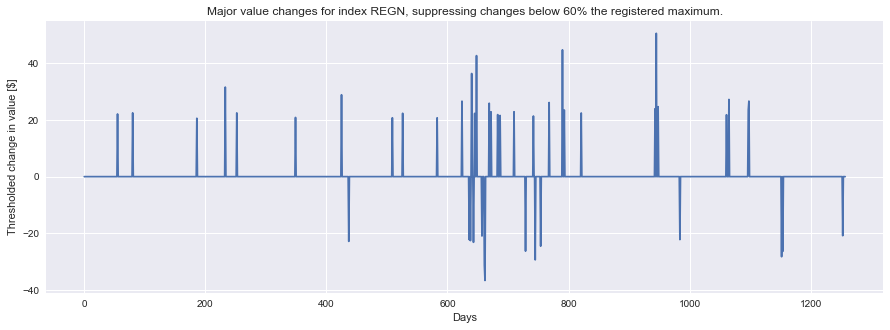

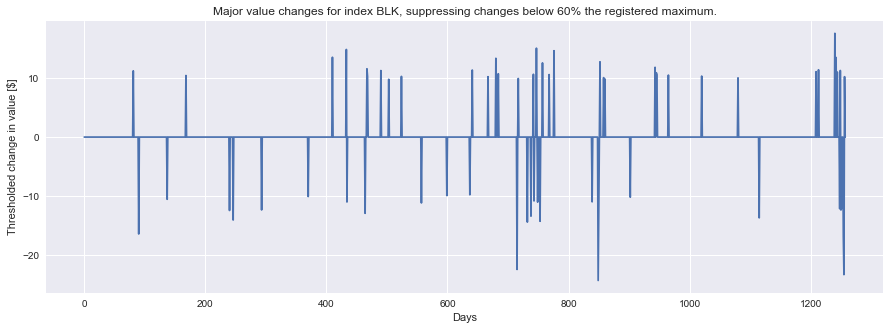

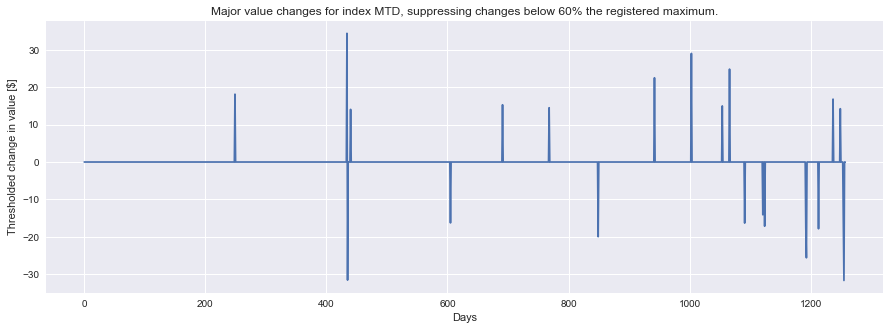

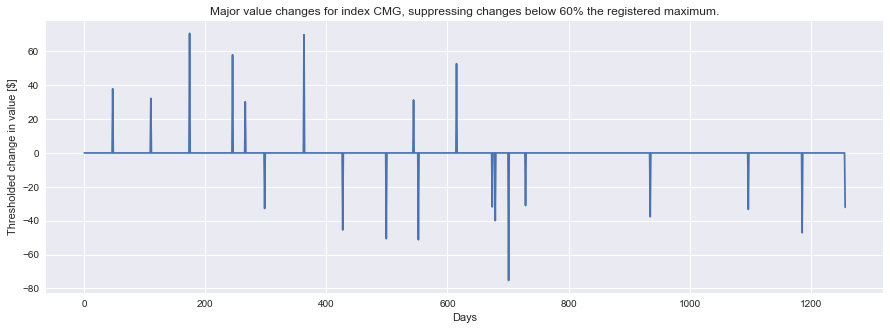

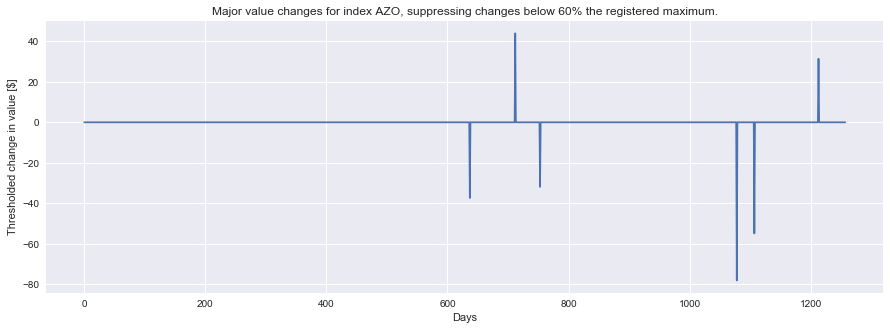

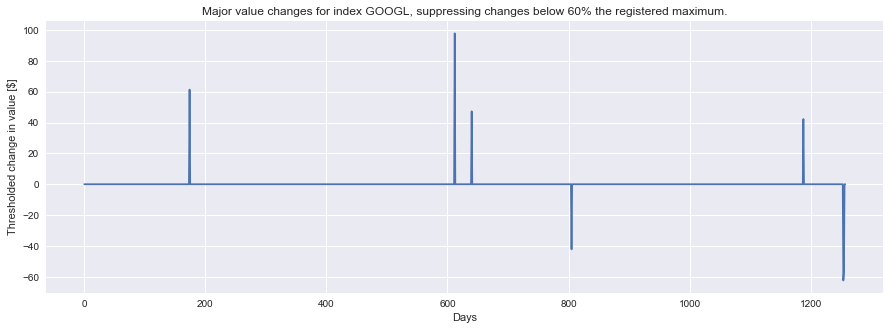

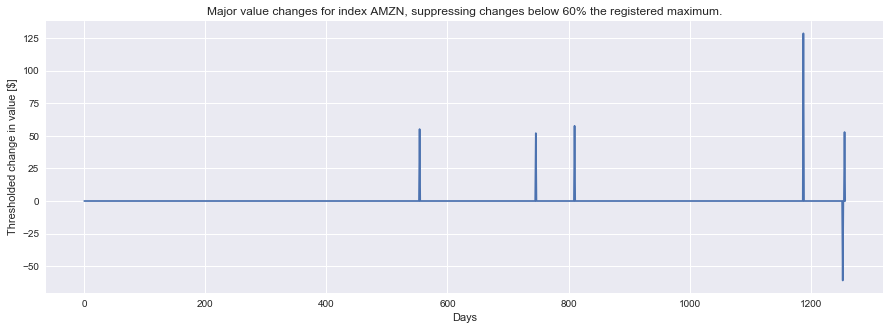

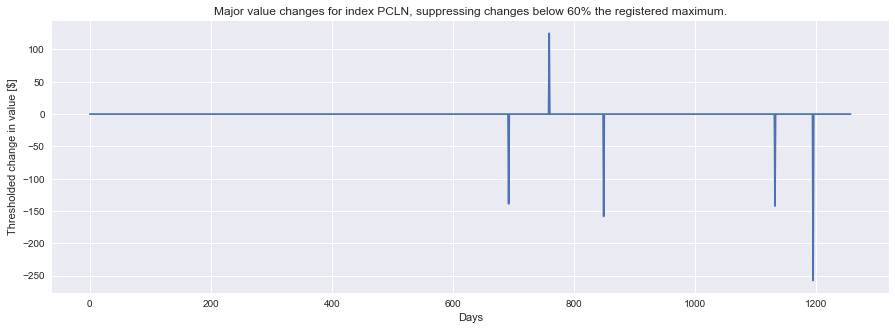

In [81]:
for k in range(data.shape[0]):
    
    fig = plt.figure(figsize=(15,5))
    plt.plot(data[k,:])
    plt.title('Major value changes for index '+str(vnames[k,0]+', suppressing changes below 60% the registered maximum.'))
    plt.xlabel('Days')
    plt.ylabel('Thresholded change in value [$]')
    plt.show()

In [141]:
lookback_len = 15
forecast_len = 10

tdata = []
tlabels = []

for delrow in range(data.shape[0]):
    
    rdata = np.delete(data,delrow,axis=0)
    for k in range(lookback_len,rdata.shape[1]):
        tlabels.append(data[delrow,k-lookback_len:k])
        tdata.append(pp.MinMaxScaler(feature_range=(0,1)).fit_transform(rdata[:,k-lookback_len:k]))
        
DATA = np.stack(tdata,axis=0)
LABELS = np.vstack(tlabels)

In [163]:
in0 = Input(shape=(DATA.shape[1],DATA.shape[2]))

lstm0 = LSTM(units=100,activation='tanh')(in0)
dense0 = Dense(units=DATA.shape[1])(lstm0)

model = Model(in0,dense0)
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [161]:
model.fit(DATA,DATA,batch_size=5,epochs=2)

ValueError: Error when checking target: expected dense_21 to have 2 dimensions, but got array with shape (24860, 19, 15)